In [81]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 14, 'xtick.top': True, 'ytick.right': True, 'xtick.direction': 'in', 'ytick.direction': 'in'})

In [3]:
# Load the data 
# Time that the boiler is on, the minimum temperature before and the maximum temperature after heating

df = pd.read_csv("hot_water_data.csv")
df['duration'] = df['duration'] / 60.0 #convert seconds to minutes
df.head(10)

,duration,temp_before,temp_after
0,18.233333,21.00,34.75
1,13.850000,24.50,34.00
2,22.866667,20.00,33.00
3,13.900000,24.50,34.50
4,102.233333,30.75,39.50
5,17.866667,23.25,33.50
6,25.033333,20.00,31.25
7,16.000000,30.00,34.25
8,0.516667,28.75,34.50
9,66.450000,28.75,42.00


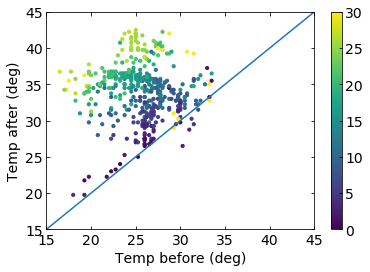

In [6]:
plt.scatter(df['temp_before'], df['temp_after'], c=df['duration'], s=10 )
plt.plot([0,50],[0,50])

plt.xlabel("Temp before (deg)")
plt.ylabel("Temp after (deg)")

plt.colorbar()

plt.clim(0,30)
plt.xlim(15,45)
plt.ylim(15,45)
plt.show()

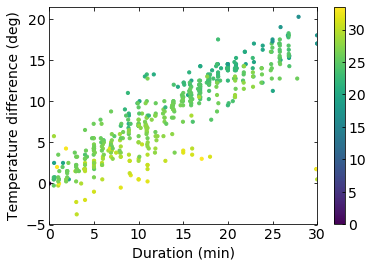

In [7]:
plt.scatter(df['duration'], df['temp_after']-df['temp_before'], c=df['temp_before'], s=10 )
plt.xlabel("Duration (min)")
plt.ylabel("Temperature difference (deg)")

plt.colorbar()

plt.xlim(0,30)
plt.show()

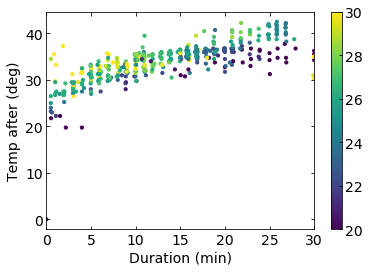

In [8]:
plt.scatter(df['duration'], df['temp_after'], c=df['temp_before'], s=10 )
plt.xlabel("Duration (min)")
plt.ylabel("Temp after (deg)")

plt.colorbar()

plt.xlim(0,30)
plt.clim(20,30)
plt.show()



In [96]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error#, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


#from sklearn import feature_selection

('Coefficients: \n', array([0.29079318]), 29.90343800878932)
mean squared error 9.614920481796513


<IPython.core.display.Javascript object>


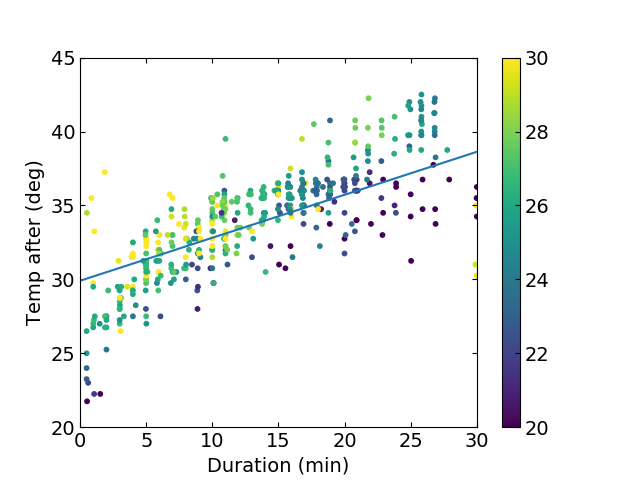

In [101]:
#linear regression model

model = linear_model.LinearRegression()
model.fit(df[['duration']], df['temp_after'])

x = np.linspace(0,30)
y = model.predict(x[:,None])

print('Coefficients: \n', model.coef_, model.intercept_)
print "mean squared error",  mean_squared_error(df['temp_after'], model.predict(df[['duration']]))

fig = plt.figure()
plt.scatter(df['duration'], df['temp_after'], c=df['temp_before'], s=10 )
plt.plot(x, y)
plt.xlabel("Duration (min)")
plt.ylabel("Temp after (deg)")

plt.colorbar()

plt.xlim(0,30)
plt.ylim(20,45)
plt.clim(20,30)
plt.show()

mean squared error 7.385654390166405


<IPython.core.display.Javascript object>


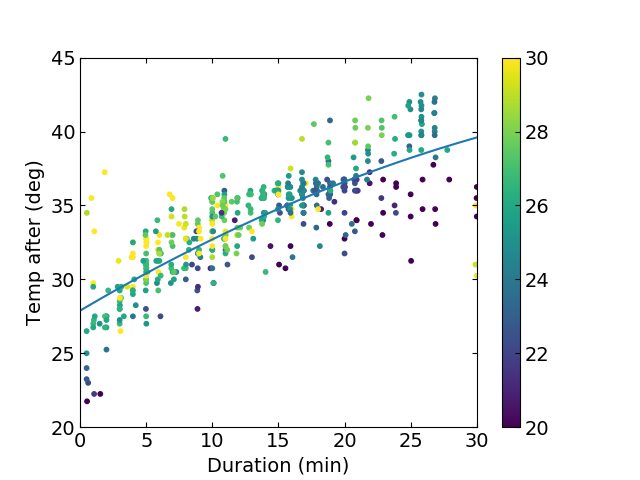

In [100]:
#linear regression model with polynomial pipeline

model = make_pipeline(PolynomialFeatures(), linear_model.Ridge())
model.fit(df[['duration']], df['temp_after'])

x = np.linspace(0,30,100)[:,None]
y = model.predict(x)

print "mean squared error",  mean_squared_error(df['temp_after'], model.predict(df[['duration']]))



fig = plt.figure()
plt.scatter(df['duration'], df['temp_after'], c=df['temp_before'], s=10 )
plt.plot(x, y, '-')

plt.xlabel("Duration (min)")
plt.ylabel("Temp after (deg)")

plt.colorbar()

plt.xlim(0,30)
plt.ylim(20,45)
plt.clim(20,30)
plt.show()

In [20]:
%matplotlib notebook

('Coefficients: \n', array([0.31369748, 0.32050553]), 21.392206229715843)
mean squared error 8.502869985850692


<IPython.core.display.Javascript object>


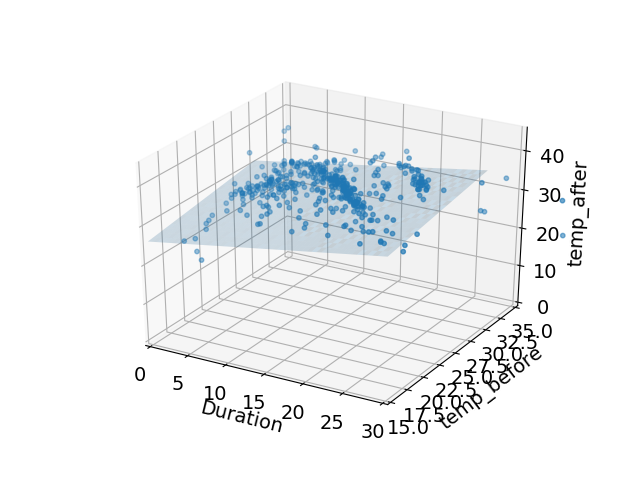

In [99]:
# “multiple linear regression” or multivariate linear regression. 

model = linear_model.LinearRegression()
model.fit(df[['duration','temp_before']].values, df['temp_after'])

X,Y = np.meshgrid(np.linspace(0,30,50), np.linspace(15,30,20))
y = model.predict(np.column_stack((X.flatten(), Y.flatten())))

print('Coefficients: \n', model.coef_, model.intercept_)
print "mean squared error",  mean_squared_error(df['temp_after'], model.predict(df[['duration', 'temp_before']]))



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['duration'], df['temp_before'], df['temp_after'], s=10 )
ax.plot_surface(X, Y, np.reshape(y, np.shape(X)),  alpha=0.2)

ax.set_xlim(0,30)
ax.set_ylim(15,35)
ax.set_zlim(0,45)

ax.set_xlabel('Duration')
ax.set_zlabel('temp_after')
ax.set_ylabel('temp_before')

plt.show()

mean squared error 2.798710897131016


<IPython.core.display.Javascript object>


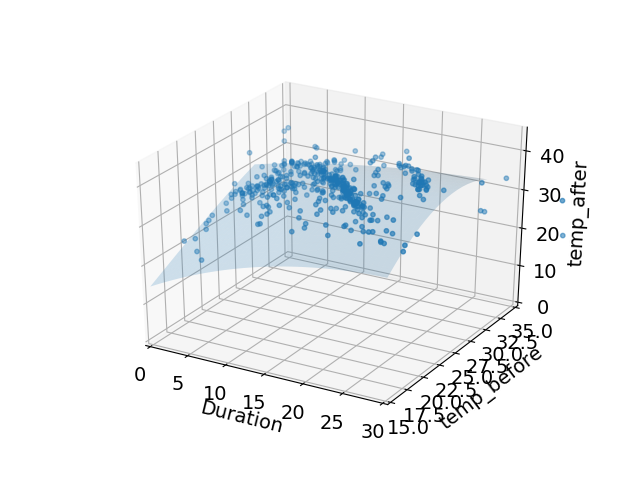

In [98]:
# “multiple linear regression” or multivariate linear regression. 

model = make_pipeline(PolynomialFeatures(3), linear_model.Ridge())
model.fit(df[['duration', 'temp_before']], df['temp_after'])

X,Y = np.meshgrid(np.linspace(0,30,50), np.linspace(15,30,20))
x = np.column_stack((X.flatten(), Y.flatten()))
y = model.predict(x)

#print('Coefficients: \n', regr.coef_, model.intercept_)
print "mean squared error",  mean_squared_error(df['temp_after'], model.predict(df[['duration', 'temp_before']]))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['duration'], df['temp_before'], df['temp_after'], s=10 )
ax.plot_surface(X,Y, np.reshape(y, np.shape(X)),  alpha=0.2)

ax.set_xlim(0,30)
ax.set_ylim(15,35)
ax.set_zlim(0,45)

ax.set_xlabel('Duration')
ax.set_zlabel('temp_after')
ax.set_ylabel('temp_before')

plt.show()